# Thesis Outcomes

In this notebook I will compare the result I got from all the algorithms I implemented. 

I will start by comparing both packing methods with each other. Then i will be comparing the Mean, followed by the Inner Product, and finish with the Variance.

For all the algorithms I am working with vector of size n = 8192 which are always filled with exactly 8192 values which can be 1, 2 or 3.

## Setup

In [10]:
# Imports
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Function to extract files from folder
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
            files = glob.glob(os.path.join(root, '*.csv'))
            for f in files:
                    all_files.append(os.path.abspath(f))
    return all_files

In [23]:
# Get file names
outcomes_CSV = get_files("../timeCSVs")

# Import csv as a Dataframe
inner_Product_DF = pd.read_csv(outcomes_CSV[1])


c:\Users\berna\Desktop\Personal\FEUP\Thesis\Project\HE_Optimization\Outcomes\timeCSVs\innerProduct.csv


In [13]:
# Auxiliary Functions

def compare_two_types_by_percentage(column1, column2, df):
    return ((df.loc[df['Type'] == column2]['Average'].values[0] - df.loc[df['Type'] == column1]['Average'].values[0] )/ df.loc[df['Type'] == column2]['Average'].values[0]) * 100

def create_df_for_type(type, setup_averages, encryption_averages, homomorphic_averages):
    df = pd.DataFrame(columns=['Time'], index=['Setup', 'Encryption', 'Homomorphic'])

    df.loc['Setup'] = float(format(setup_averages[setup_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Encryption'] = float(format(encryption_averages[encryption_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Homomorphic'] = float(format(homomorphic_averages[homomorphic_averages['Type'] == type]['Average'].values[0], ".2f"))

    return df

## Inner Product

For the inner Product we only have one implementation per packing, this is because we are only going to use the method that gave us the best results for each packing in the mean implementation.

In [14]:
inner_Product_DF['type'].unique()

array(['optimized-slot', 'coef', 'coef-setup-reverse'], dtype=object)

In [15]:
### Create DF for each type of implementation
optimized_slot_DF = inner_Product_DF[inner_Product_DF['type'] == "optimized-slot"]
coef_DF = inner_Product_DF[inner_Product_DF['type'] == "coef-setup-reverse"]

inner_product_implementation_dfs = {'optimized_slot': optimized_slot_DF, 'coef': coef_DF}

### Total Run Time

In [16]:
inner_product_total_time_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in inner_product_implementation_dfs.items():
    inner_product_total_time_averages.loc[len(inner_product_total_time_averages)] = {'Type': name, 'Average': df[' total'].mean()}

[Text(0, 0, '389.612'), Text(0, 0, '103.1')]

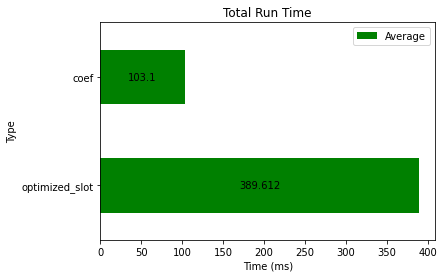

In [17]:
ax = inner_product_total_time_averages.plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Total Run Time')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

In [18]:
# Compare Coefficient vs Optimized Slot
ip_coef_vs_optimized_slot = format(compare_two_types_by_percentage("coef", "optimized_slot", inner_product_total_time_averages),
                             ".2f")

### Time per phase

In [19]:
### Create a DataFrame for each phase with the average of each type of algorithm

# Setup
setup_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in inner_product_implementation_dfs.items():
    setup_averages.loc[len(setup_averages)] = {'Type': name, 'Average': df[' setup'].mean()}

# Encryption
encryption_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in inner_product_implementation_dfs.items():
    encryption_averages.loc[len(encryption_averages)] = {'Type': name, 'Average': df[' encryption'].mean()}

# Homomorphic
homomorphic_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in inner_product_implementation_dfs.items():
    homomorphic_averages.loc[len(homomorphic_averages)] = {'Type': name, 'Average': df[' homomorphic'].mean()}

In [20]:
# SETUP
setup_coef_vs_optimized_slot = format(compare_two_types_by_percentage("coef", "optimized_slot", setup_averages),
                             ".2f")

# Encryption
encryption_coef_vs_optimized_slot = format(compare_two_types_by_percentage("optimized_slot", "coef", encryption_averages),
                             ".2f")

# Homomorphic
homomorphic_coef_vs_optimized_slot = format(compare_two_types_by_percentage("coef", "optimized_slot", homomorphic_averages),
                             ".2f")

[Text(0, 0, '87.872'), Text(0, 0, '16.936')]

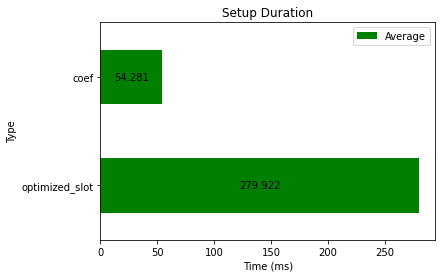

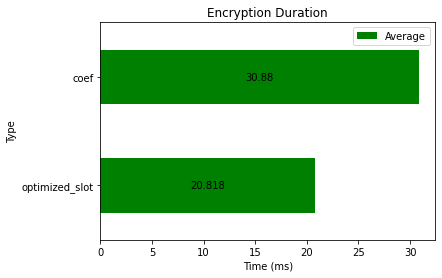

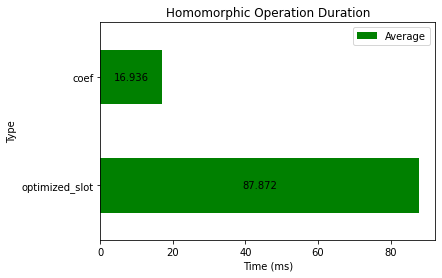

In [21]:
### Plot a graph for each phase

# Setup
ax = setup_averages.plot.barh(x='Type', color='green', title='Setup Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

# Encryption
ax = encryption_averages.plot.barh(x='Type', color='green', title='Encryption Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

# Homomorphic
# Needs two graphs because the values ara in a huge range
ax = homomorphic_averages.plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Homomorphic Operation Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

In [22]:
print("Total Time:")
print("Coefficient vs Optimized Slot: " + str(ip_coef_vs_optimized_slot) + "%")

print("\nSetup Operations:")
print("Coefficient vs Optimized Slot: " + str(setup_coef_vs_optimized_slot) + "%")

print("\nEncrypt Operations:")
print("Optimized Slot vs Coefficient: " + str(encryption_coef_vs_optimized_slot) + "%")

print("\nHomomorphic Operations:")
print("Coefficient vs Optimized Slot: " + str(homomorphic_coef_vs_optimized_slot) + "%")


Total Time:
Coefficient vs Optimized Slot: 73.54%

Setup Operations:
Coefficient vs Optimized Slot: 80.61%

Encrypt Operations:
Optimized Slot vs Coefficient: 32.58%

Homomorphic Operations:
Coefficient vs Optimized Slot: 80.73%


## Conclusion

The results are as expect.

Coefficient not only has faster multiplication than slot packing has it only needs one multiplication to calculate the inner product.

As such we see that the coefficient packing is 73,5% faster than the slot packing version. 

It is way faster in the setup phase and in the homomorphic phase (this as already been explained). In the setup phase the only thing we need to do in the coefficient packing, besides generating the parameters and eval keys, is reversing one of the vectors. Meanwhile, if we are using slot packing we need to generate all the evaluation rotation keys, which takes a lot of time (when compared to reversing a vector).

The only advantage for the slot packing is the encryption time, which is 32,58% faster. As seen with the experiments in the mean, this should be tested with larger vectors size, as there may be a size big enough where this advantage may overtake the loss of time in the setup and homomorphic phase